In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\monol\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [4]:
df = pd.read_csv("mergedData.csv", index_col=0)

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

In [5]:
# Set features. This will also be used as our X values.

# economic data - 3 years rolling average GDP, Unemployment, Consumer Confidence, Median Income
selected_features1 = df.iloc[:,20:24]

# political data - current year presidential approval/disapproval rating
selected_features2 = df.iloc[:,49:51]

# genre data - comedy, documentary, sci-fi, etc.
selected_features3 = df.iloc[:,24:46]

# stock data - equity prices of S&P 500, Netflix
selected_features4 = df.iloc[:,52:54]

# sentiment data - based on NY Times articles
selected_features5 = df.iloc[:,54:55]

# merge everything
selected_features = pd.merge(selected_features1, selected_features2, left_index=True, right_index=True)
selected_features = pd.merge(selected_features, selected_features3, left_index=True, right_index=True)
selected_features = pd.merge(selected_features, selected_features4, left_index=True, right_index=True)
selected_features = pd.merge(selected_features, selected_features5, left_index=True, right_index=True)

selected_features.head()

,GDP_AVG,Unemployment_AVG,Confidence_AVG,Median_Income_AVG,Approving,Disapproving,drama,comedy,thriller,romance,...,sport,history,war,musical,documentary,western,news,NFLX Adj Close,GSPC Adj Close,Sentiment Average per year
1,2.205866,7.202778,99.206066,56908.333333,44.129032,50.806452,0,0,0,0,...,0,0,0,0,0,0,0,51.775714,1889.767142,0.037000
15,2.289174,4.833333,100.987719,60265.666667,62.333333,31.000000,1,0,0,0,...,0,0,0,0,0,0,0,0.792313,899.178574,-0.043163
16,2.289174,4.833333,100.987719,60265.666667,65.000000,27.000000,0,0,1,0,...,0,0,0,0,0,0,0,0.870974,912.552274,-0.043163
17,1.867082,5.500000,100.244875,59561.333333,65.666667,30.000000,0,1,0,0,...,0,0,0,0,0,0,0,1.637041,935.962853,-0.017662
18,1.867082,5.500000,100.244875,59561.333333,58.500000,37.000000,1,0,0,0,...,0,0,0,0,0,0,0,3.615227,1080.635920,-0.017662


In [6]:
def train_test(X, y, title, xlabel, ylabel, image_name):
    from sklearn.model_selection import train_test_split

    # train_test likes numpy arrays, so transform dataframes into arrays
    # reshape as needed by train_test
    X = X.to_numpy()
    y = y.to_numpy().reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Scale our data
    from sklearn.preprocessing import MinMaxScaler

    # create a scaler fit for training data
    X_scaler = MinMaxScaler().fit(X_train)
    y_scaler = MinMaxScaler().fit(y_train)

    # scale the train and test data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    
    from sklearn.linear_model import LinearRegression

    # use a linear regression model for our data
    model = LinearRegression()

    # fit training data for model
    model.fit(X_train_scaled, y_train_scaled)

    # create a residual plot of training and test data
    plt.figure(figsize=(10,5), dpi=(100))
    plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
    plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(os.path.join("..", "images", image_name))
    plt.show()
    
    # Display R^2 scores of training and test data
    print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
    print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

## Train/Test All Features

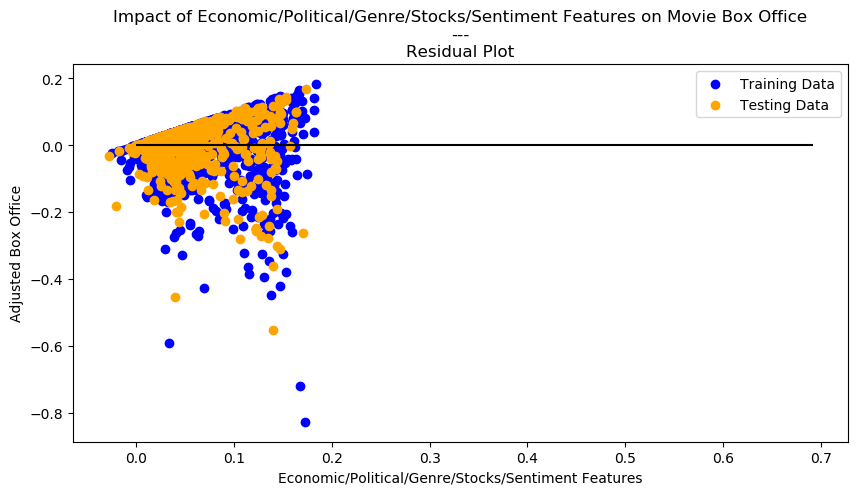

Training Data Score: 0.22620995404192035
Testing Data Score: 0.22242865305756776


In [7]:
train_test(selected_features,
           df["Box_Office_Adjusted"],
           "Impact of Economic/Political/Genre/Stocks/Sentiment Features on Movie Box Office\n---\nResidual Plot",
           "Economic/Political/Genre/Stocks/Sentiment Features",
           "Adjusted Box Office",
           "001_all_features_ML.png")

## Train/Test Just Economic Features

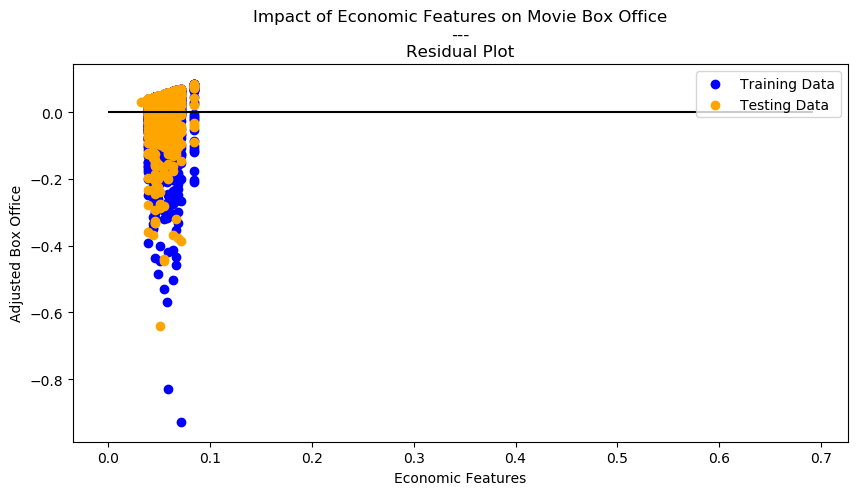

Training Data Score: 0.014529466316077988
Testing Data Score: -0.00835648710409398


In [8]:
train_test(selected_features1,
           df["Box_Office_Adjusted"],
           "Impact of Economic Features on Movie Box Office\n---\nResidual Plot",
           "Economic Features",
           "Adjusted Box Office",
           "002_economic_features_ML.png")

## Train/Test Just Political Features

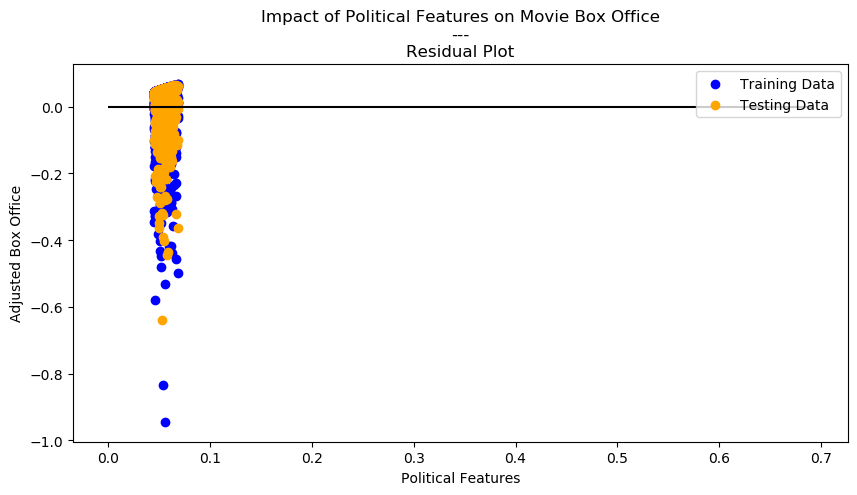

Training Data Score: 0.003693351176130344
Testing Data Score: 0.006890037497626178


In [9]:
train_test(selected_features2,
           df["Box_Office_Adjusted"],
           "Impact of Political Features on Movie Box Office\n---\nResidual Plot",
           "Political Features",
           "Adjusted Box Office",
           "003_political_features_ML.png")

## Train/Test Just Genre Features

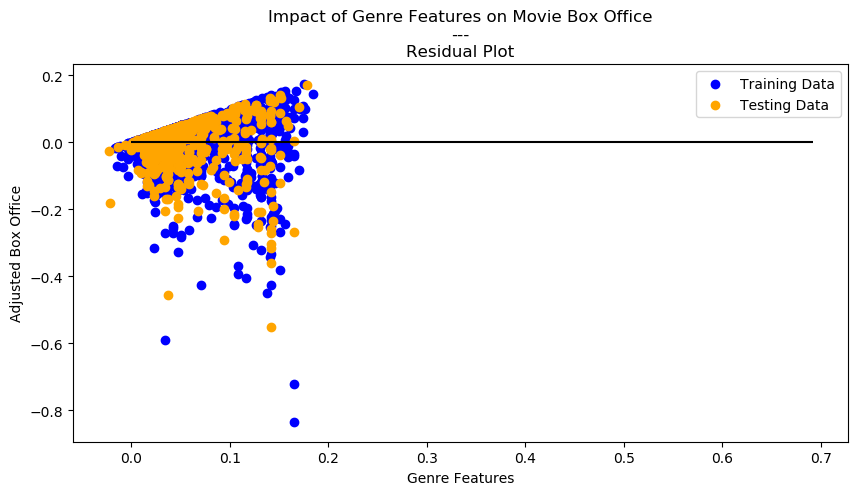

Training Data Score: 0.21933752570375076
Testing Data Score: 0.2263829006917617


In [10]:
train_test(selected_features3,
           df["Box_Office_Adjusted"],
           "Impact of Genre Features on Movie Box Office\n---\nResidual Plot",
           "Genre Features",
           "Adjusted Box Office",
           "004_genre_features_ML.png")

## Train/Test Just Stock Features

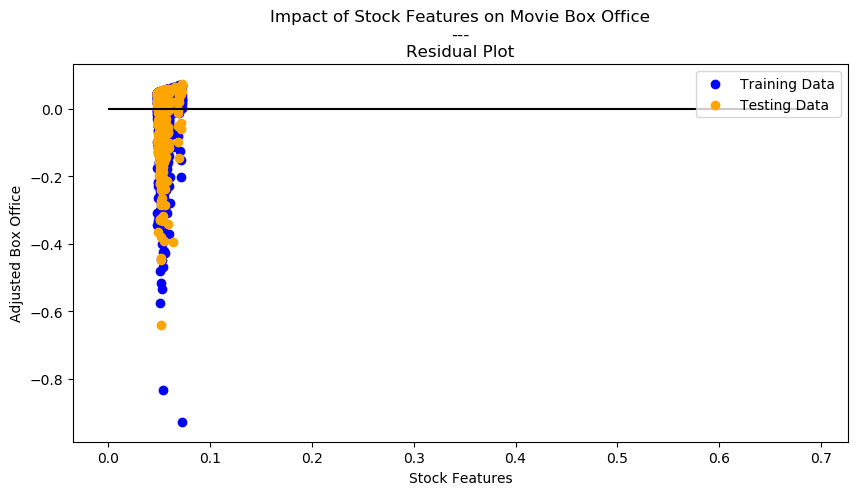

Training Data Score: 0.0020609442264986066
Testing Data Score: 0.00023213376886399573


In [11]:
train_test(selected_features4,
           df["Box_Office_Adjusted"],
           "Impact of Stock Features on Movie Box Office\n---\nResidual Plot",
           "Stock Features",
           "Adjusted Box Office",
           "005_stock_features_ML.png")

## Train/Test Just Sentiment Features

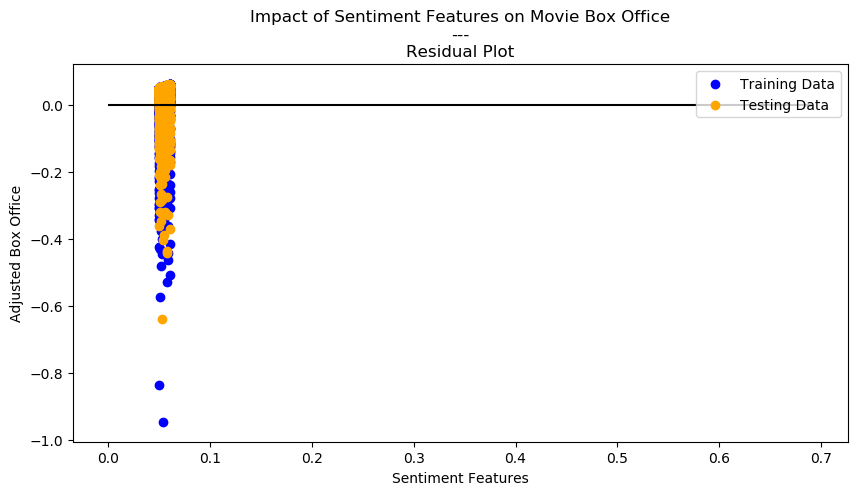

Training Data Score: 0.001568234007027769
Testing Data Score: 0.004104995294035185


In [12]:
train_test(selected_features5,
           df["Box_Office_Adjusted"],
           "Impact of Sentiment Features on Movie Box Office\n---\nResidual Plot",
           "Sentiment Features",
           "Adjusted Box Office",
           "006_sentiment_features_ML.png")